<a href="https://colab.research.google.com/github/MAL3X-01/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module4-clustering/Cell_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

Your assignment is to use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

It may be helpful to use PCA to reduce the dimensions of your data first in order to obtain --but then again, maybe not. I dunno, you're the data scientist, you tell me.🤪 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()

(569, 33)


id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0    842302         M  ...                  0.11890          NaN
1    842517         M  ...                  0.08902          NaN
2  84300903         M  ...                  0.08758          NaN
3  84348301         M  ...                  0.17300          NaN
4  84358402         M  ...                  0.07678          NaN

[5 rows x 33 columns]

## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [2]:
dfx = df.drop(['diagnosis', 'Unnamed: 32'], axis=1)
dfy = df[['diagnosis']]
print(dfx.shape)
dfx.head()

(569, 31)


id  radius_mean  ...  symmetry_worst  fractal_dimension_worst
0    842302        17.99  ...          0.4601                  0.11890
1    842517        20.57  ...          0.2750                  0.08902
2  84300903        19.69  ...          0.3613                  0.08758
3  84348301        11.42  ...          0.6638                  0.17300
4  84358402        20.29  ...          0.2364                  0.07678

[5 rows x 31 columns]

In [3]:
print(dfy.shape)
dfy.head()

(569, 1)


diagnosis
0         M
1         M
2         M
3         M
4         M

In [30]:
dfy['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

# You take it from here!

See what you can come up with. You have all the know-how! 

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to do PCA on this data to see if that helps you find distinct linearly-separable clusters.
  - (In the real world, truly linearly-separable clusters are rare.)
- You might want to use an elbow chart to decide on the number of clusters to use.
- You might want to use a scree plot to decide how many principal components to include in your clustering.
- You might want to standardize your data before PCA (If you decide to use PCA). 

## Manage your time and don't spend it all on data exploration or something like that. You got this!

# PCA

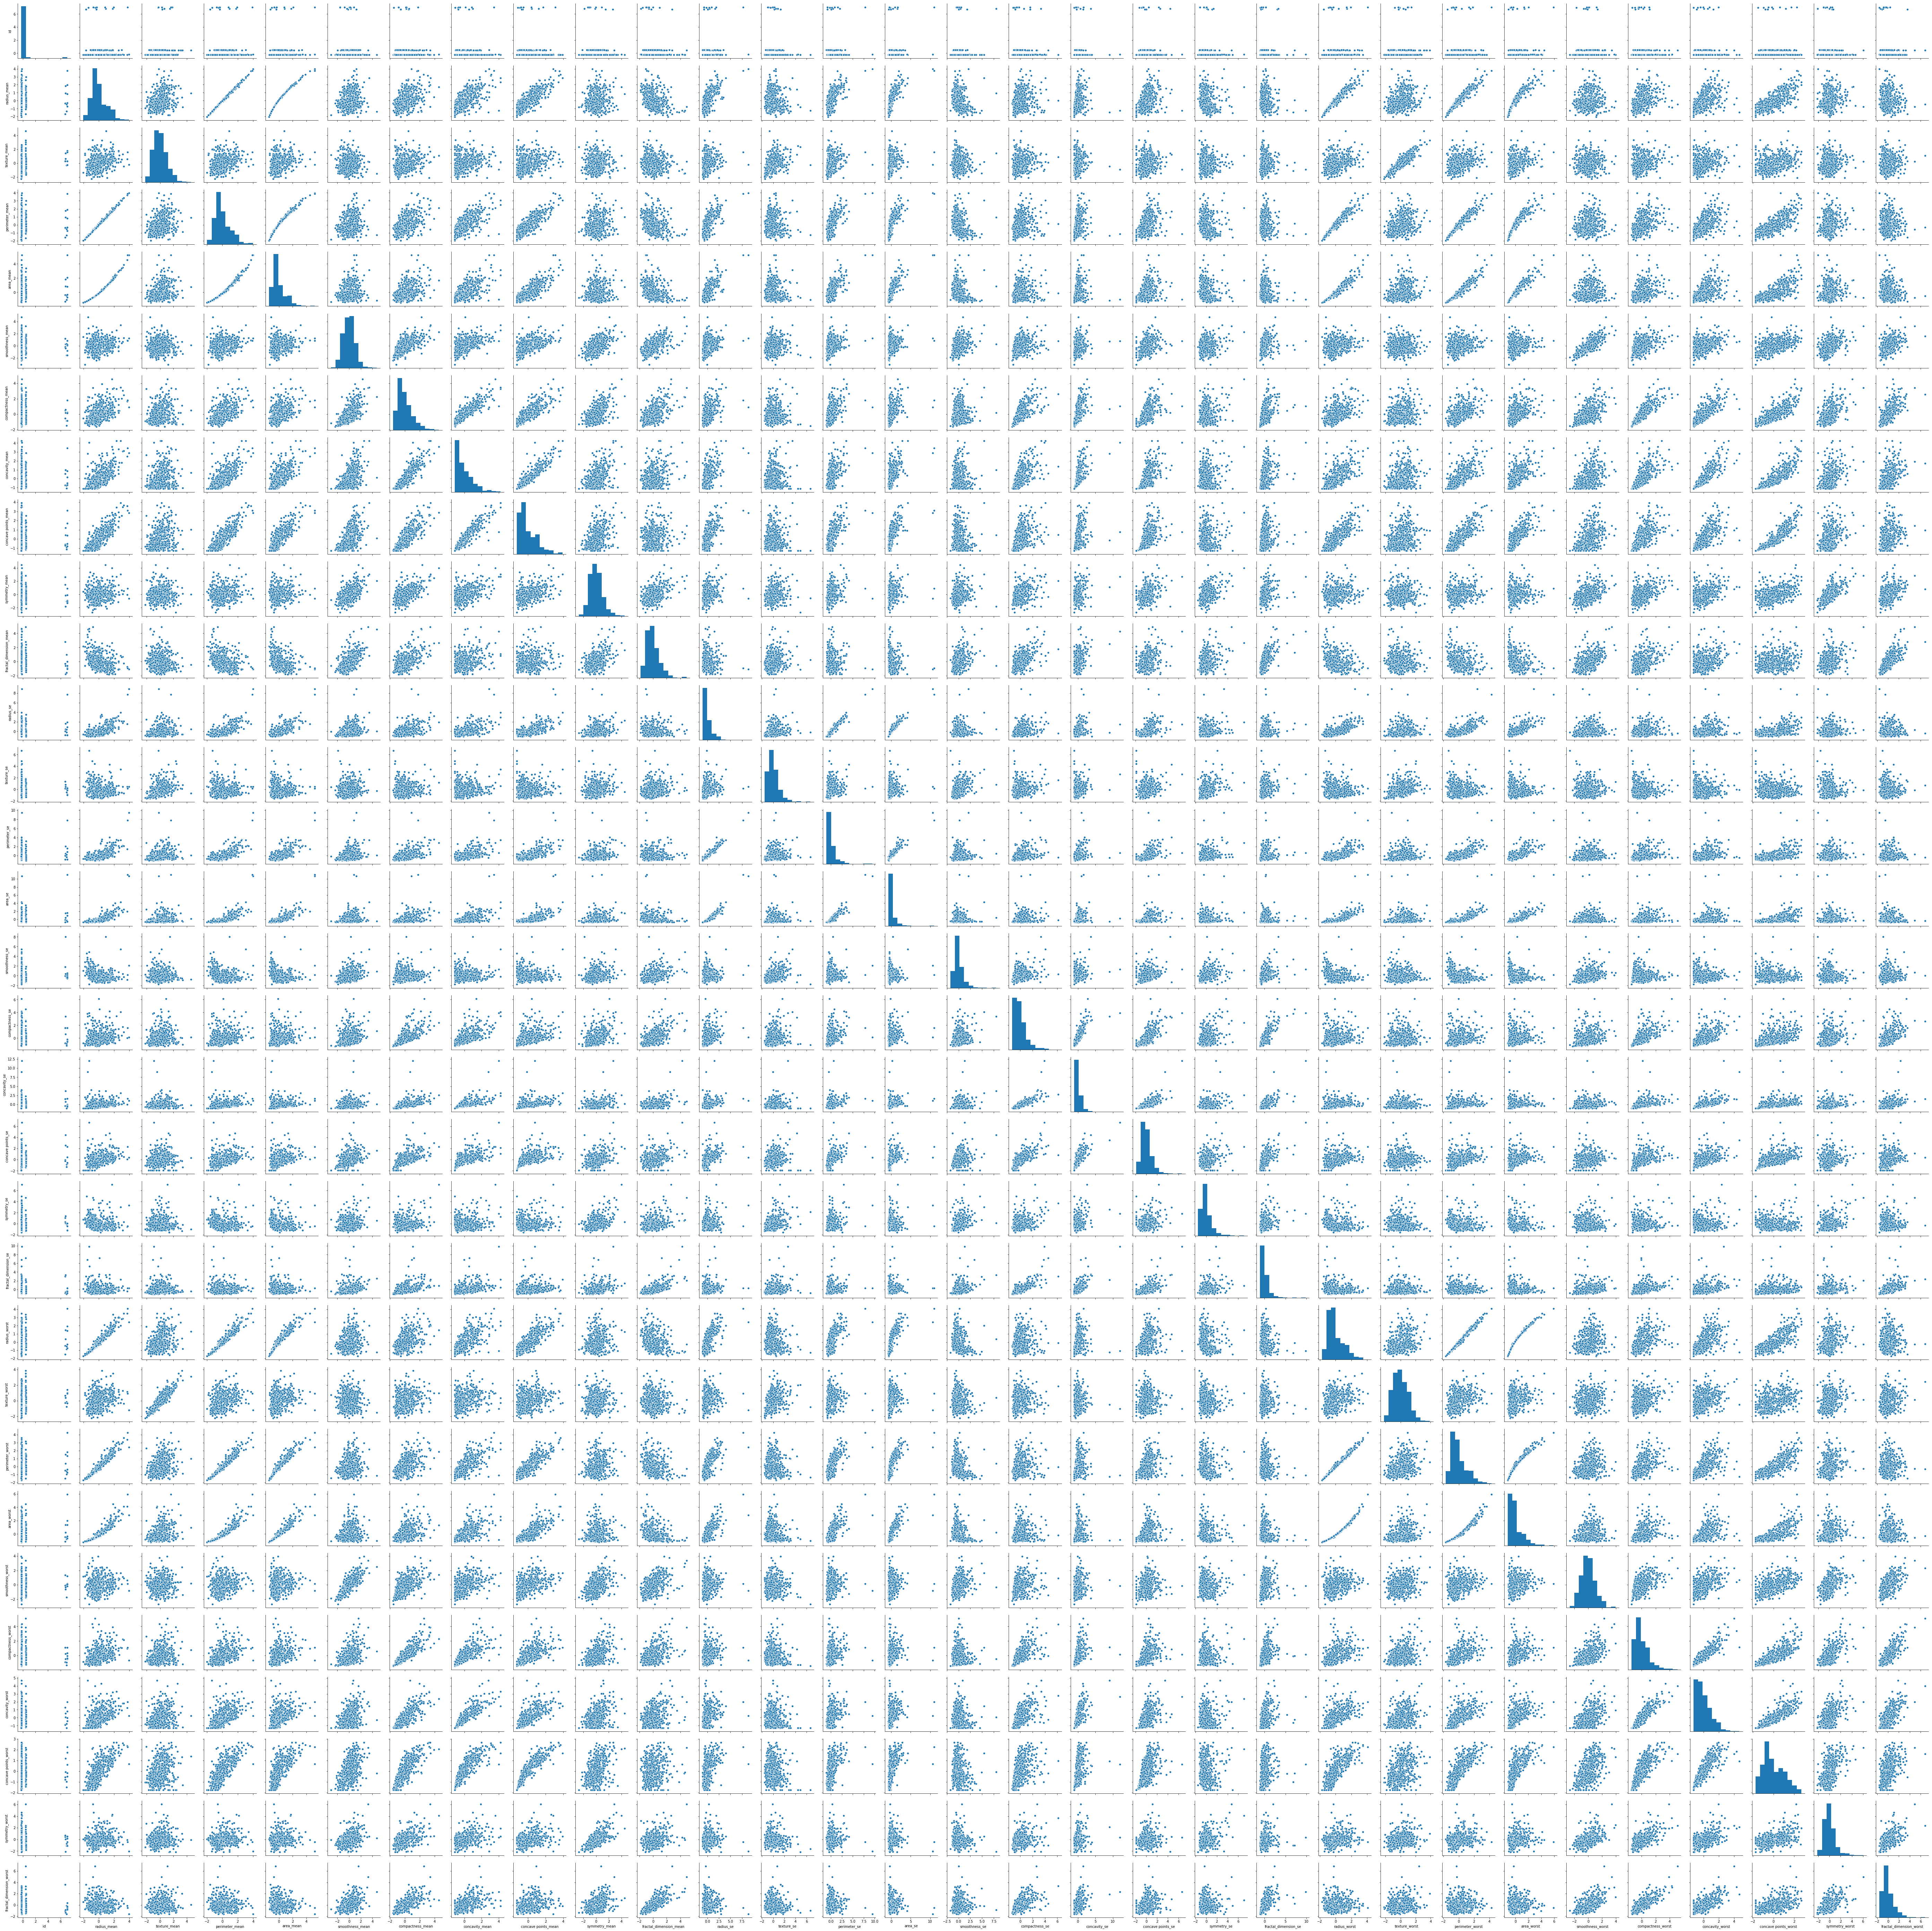

In [36]:
sns.pairplot(dfx)

In [5]:
dfx.describe()

id  radius_mean  ...  symmetry_worst  fractal_dimension_worst
count  5.690000e+02   569.000000  ...      569.000000               569.000000
mean   3.037183e+07    14.127292  ...        0.290076                 0.083946
std    1.250206e+08     3.524049  ...        0.061867                 0.018061
min    8.670000e+03     6.981000  ...        0.156500                 0.055040
25%    8.692180e+05    11.700000  ...        0.250400                 0.071460
50%    9.060240e+05    13.370000  ...        0.282200                 0.080040
75%    8.813129e+06    15.780000  ...        0.317900                 0.092080
max    9.113205e+08    28.110000  ...        0.663800                 0.207500

[8 rows x 31 columns]

In [6]:
dfx.mean()

id                         3.037183e+07
radius_mean                1.412729e+01
texture_mean               1.928965e+01
perimeter_mean             9.196903e+01
area_mean                  6.548891e+02
smoothness_mean            9.636028e-02
compactness_mean           1.043410e-01
concavity_mean             8.879932e-02
concave points_mean        4.891915e-02
symmetry_mean              1.811619e-01
fractal_dimension_mean     6.279761e-02
radius_se                  4.051721e-01
texture_se                 1.216853e+00
perimeter_se               2.866059e+00
area_se                    4.033708e+01
smoothness_se              7.040979e-03
compactness_se             2.547814e-02
concavity_se               3.189372e-02
concave points_se          1.179614e-02
symmetry_se                2.054230e-02
fractal_dimension_se       3.794904e-03
radius_worst               1.626919e+01
texture_worst              2.567722e+01
perimeter_worst            1.072612e+02
area_worst                 8.805831e+02


In [8]:
dfx = dfx-dfx.mean()
dfx.head()

id  radius_mean  ...  symmetry_worst  fractal_dimension_worst
0 -2.952953e+07     3.862708  ...        0.170024                 0.034954
1 -2.952931e+07     6.442708  ...       -0.015076                 0.005074
2  5.392907e+07     5.562708  ...        0.071224                 0.003634
3  5.397647e+07    -2.707292  ...        0.373724                 0.089054
4  5.398657e+07     6.162708  ...       -0.053676                -0.007166

[5 rows x 31 columns]

In [9]:
dfx = dfx/dfx.std()
dfx.head()

id  radius_mean  ...  symmetry_worst  fractal_dimension_worst
0 -0.236197     1.096100  ...        2.748204                 1.935312
1 -0.236196     1.828212  ...       -0.243675                 0.280943
2  0.431362     1.578499  ...        1.151242                 0.201214
3  0.431741    -0.768233  ...        6.040726                 4.930672
4  0.431821     1.748758  ...       -0.867590                -0.396751

[5 rows x 31 columns]

In [10]:
xcov = dfx.cov()
xcov

id  ...  fractal_dimension_worst
id                       1.000000  ...                -0.029866
radius_mean              0.074626  ...                 0.007066
texture_mean             0.099770  ...                 0.119205
perimeter_mean           0.073159  ...                 0.051019
area_mean                0.096893  ...                 0.003738
smoothness_mean         -0.012968  ...                 0.499316
compactness_mean         0.000096  ...                 0.687382
concavity_mean           0.050080  ...                 0.514930
concave points_mean      0.044158  ...                 0.368661
symmetry_mean           -0.022114  ...                 0.438413
fractal_dimension_mean  -0.052511  ...                 0.767297
radius_se                0.143048  ...                 0.049559
texture_se              -0.007526  ...                -0.045655
perimeter_se             0.137331  ...                 0.085433
area_se                  0.177742  ...                 0.017539
smoothness_se            0.096781  ...                 0.101480
compactness_se           0.033961  ...                 0.590973
concavity_se             0.055239  ...                 0.439329
concave points_se        0.078768  ...                 0.310655
symmetry_se             -0.017306  ...                 0.078079
fractal_dimension_se     0.025725  ...                 0.591328
radius_worst             0.082405  ...                 0.093492
texture_worst            0.064720  ...                 0.219122
perimeter_worst          0.079986  ...                 0.138957
area_worst               0.107187  ...                 0.079647
smoothness_worst         0.010338  ...                 0.617624
compactness_worst       -0.002968  ...                 0.810455
concavity_worst          0.023203  ...                 0.686511
concave points_worst     0.035174  ...                 0.511114
symmetry_worst          -0.044224  ...                 0.537848
fractal_dimension_worst -0.029866  ...                 1.000000

[31 rows x 31 columns]

In [11]:
eigenvalues, eigenvectors = np.linalg.eig(xcov)

print('Eigenvalues:\n', eigenvalues)
print('Eigenvectors:\n', eigenvectors)

Eigenvalues:
 [1.32880574e+01 5.69680537e+00 2.83539505e+00 1.98135718e+00
 1.64881531e+00 1.23467271e+00 9.78273239e-01 6.71752969e-01
 4.60792428e-01 4.03133096e-01 3.49154976e-01 2.93890434e-01
 2.61146925e-01 2.41330214e-01 1.56973649e-01 9.41285258e-02
 7.98099486e-02 5.90462723e-02 5.25911946e-02 4.91219277e-02
 3.10707842e-02 2.99412056e-02 2.74305238e-02 2.42490222e-02
 1.80393609e-02 1.54797297e-02 8.17169884e-03 6.89810286e-03
 1.33040206e-04 7.48376054e-04 1.58933755e-03]
Eigenvectors:
 [[-2.29121629e-02 -3.40684907e-02 -9.69384357e-02 -2.65980453e-02
  -1.13275871e-02 -3.16733438e-01 -9.07115632e-01  9.63624150e-02
   1.49115642e-01  1.69267515e-01 -5.81889971e-02 -6.72125159e-03
   4.84108383e-03 -6.50009912e-03 -6.88594292e-03  2.75349185e-03
  -7.77998301e-03  1.97073716e-02 -5.44224782e-03 -2.04549082e-02
  -9.87091673e-03  6.19570677e-03  3.19033693e-03 -1.02890273e-02
  -4.23338835e-03 -1.32609967e-03 -2.57132397e-03  1.62387479e-03
  -7.12258084e-05 -6.85226337e-04  

In [14]:
PD = eigenvectors.T.dot(dfx.T)

print(PD.T.shape)
print("\n Projected Data: \n", PD.T[:,:2])

(569, 31)

 Projected Data: 
 [[ -9.17512669   1.96953838]
 [ -2.38120246  -3.75015903]
 [ -5.73742406  -1.07940072]
 ...
 [ -1.25078953  -1.89231171]
 [-10.35592316   1.69490621]
 [  5.4734476   -0.67219657]]


In [26]:
pca1 = pd.DataFrame(-1*PD.T[:,:1], columns=['pca1'])
print(pca1.shape)
pca1.head()

(569, 1)


pca1
0  9.175127
1  2.381202
2  5.737424
3  7.118121
4  3.942225

In [27]:
pca2 = pd.DataFrame(PD.T[:,1:2], columns=['pca2'])
print(pca2.shape)
pca2.head()

(569, 1)


pca2
0   1.969538
1  -3.750159
2  -1.079401
3  10.263195
4  -1.957967

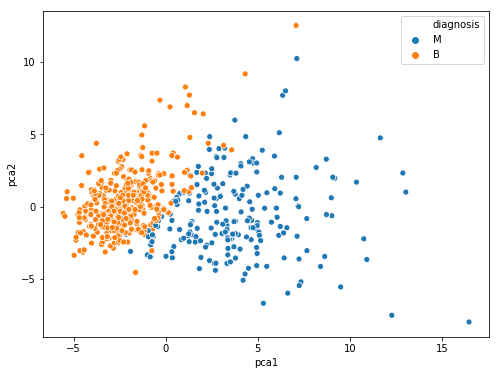

In [28]:
plt.figure(figsize=(8, 6), facecolor='w')
sns.scatterplot(x= pca1['pca1'], y= pca2['pca2'], hue=dfy['diagnosis']);

# Check PCA

In [19]:
X = dfx

pca = PCA(2)

pca.fit(X)
        
# access values and vectors
print("\n Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n",pca.explained_variance_)
# transform data
B = pca.transform(X)
print("\n Projected Data: \n", B)


 Eigenvectors: 
 [[ 0.02291216  0.21891302  0.10384388  0.22753491  0.22104577  0.14241471
   0.2390673   0.25828025  0.26073811  0.13797774  0.06414779  0.20611747
   0.01741339  0.21144652  0.20307642  0.01467821  0.1702884   0.15354367
   0.18340675  0.04241552  0.10249607  0.22800935  0.10451545  0.23663734
   0.22493214  0.12782441  0.20988456  0.22860218  0.2507462   0.12267993
   0.13156024]
 [-0.03406849 -0.2332714  -0.0600442  -0.214589   -0.23066882  0.18642221
   0.15245473  0.06054163 -0.03416739  0.19068498  0.36653106 -0.1059357
   0.08954779 -0.08980704 -0.15277129  0.20318988  0.23250336  0.19684608
   0.12996518  0.18355863  0.27958414 -0.21929604 -0.04550122 -0.19929599
  -0.21898546  0.17256296  0.14425364  0.09852652 -0.00753437  0.14261944
   0.27570208]]

 Eigenvalues: 
 [13.28805741  5.69680537]

 Projected Data: 
 [[ 9.17512669  1.96953838]
 [ 2.38120246 -3.75015903]
 [ 5.73742406 -1.07940072]
 ...
 [ 1.25078953 -1.89231171]
 [10.35592316  1.69490621]
 [-5.4734

In [20]:
pca = pd.DataFrame(pca.fit_transform(dfx), columns=['pca 1','pca 2'])
pca.head()

pca 1      pca 2
0  9.175127   1.969538
1  2.381202  -3.750159
2  5.737424  -1.079401
3  7.118121  10.263195
4  3.942225  -1.957967

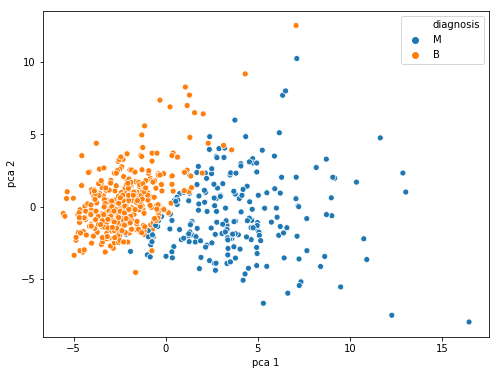

In [31]:
plt.figure(figsize=(8, 6), facecolor='w')

sns.scatterplot(x= pca['pca 1'], y= pca['pca 2'], hue=dfy['diagnosis']);

# K-Means Clustering

In [0]:
sum_of_squared_distances = []
K = range(1,30)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(PD)
    sum_of_squared_distances.append(km.inertia_)

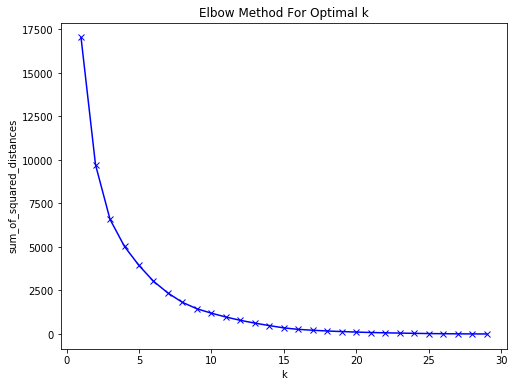

In [56]:
plt.figure(figsize=(8, 6), facecolor='w')

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

TypeError: ignored

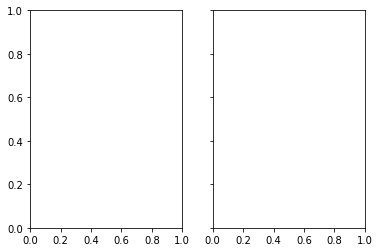

# Stretch Goal:

Once you are satisfied with your clustering, go back and add back in the labels from the original dataset to check how accurate your clustering was. Remember that this will not be a possibility in true unsupervised learning, but it might be a helpful for your learning to be able to check your work against the "ground truth". Try different approaches and see which one is the most successful and try understand why that might be the case. If you go back and try different methods don't ever include the actual "diagnosis" labels in your clustering or PCA.

**Side Note** Data Science is never DONE. You just reach a point where the cost isn't worth the benefit anymore. There's always more moderate to small improvements that we could make. Don't be a perfectionist, be a pragmatist.